## A team of scientists has analyzed 90 samples that are a mixture of four different species with different concentrations. It has been established that each specie has its own pure component fingerprint. Three different spectroscopy instruments (InsA, InsB, and InsC) have been used for the same. The dataset can be found in [Dataset, click here to get dataset]. The rows indicate the samples and the columns indicate the wavelengths at which they have been measured.

In [16]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Specify the folder path containing the CSV files
folder_path = 'Spectroscopy_data'

# Initialize an empty dictionary to store dataframes
dataframes = {}

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        dataframe_name = os.path.splitext(file_name)[0]  # Get the file name without extension
        dataframes[dataframe_name] = pd.read_csv(file_path, header = None)

# Now, the dataframes dictionary contains each dataframe with its respective name
# Access them like dataframes['file1'], dataframes['file2'], etc.

In [18]:
print(list(dataframes.keys()))

['InsA', 'InsB', 'InsC', 'Test_data']


In [19]:
# Preprocessing: Standardize the data
scaler = StandardScaler()
scaled_data_insA = scaler.fit_transform(dataframes['InsA'])
scaled_data_insB = scaler.fit_transform(dataframes['InsB'])
scaled_data_insC = scaler.fit_transform(dataframes['InsC'])

In [20]:
scaled_data_insA.shape

(90, 176)

### (a) Perform PCA on each of the datasets and choose the appropriate number of principal components for de-noising the dataset. Use the Scree plot to choose an appropriate number of principal components

In [21]:
# Function to get the principal components 
def get_principal_comps(X, Vt,n):
    # X: data matrix, Vt: right singular matrix
    PC = X@(Vt.T)
    return PC[:,:n]

# function to obtain variance explained
def get_var(S,n):
    # S: vector of single values
    eig = S**2
    return eig[n]/np.sum(eig)

# Function to reconstruct data
def reconstruct_data_mat (PC, Vt,n):
    # PC: principal components. Vt: Right singular matrix
    X_ = PC@(Vt[:n, :])
    return X_

In [22]:
# SVD
Ua,Sa,Vta = np.linalg.svd(scaled_data_insA)
Ub,Sb,Vtb = np.linalg.svd(scaled_data_insB)
Uc,Sc,Vtc = np.linalg.svd(scaled_data_insC)

# Initialize lists to store explained variance for each instrument
explained_variance_insA = []
explained_variance_insB = []
explained_variance_insC = []

In [23]:
# Calculate explained variance for each principal component using your functions
for i in range(1, len(Sa) + 1):
    PC_insA = get_principal_comps(scaled_data_insA, Vta, i-1)
    explained_variance_insA.append(get_var(Sa, i-1))

for i in range(1, len(Sb) + 1):
    PC_insB = get_principal_comps(scaled_data_insB, Vtb, i-1)
    explained_variance_insB.append(get_var(Sb, i-1))

for i in range(1, len(Sc) + 1):
    PC_insC = get_principal_comps(scaled_data_insC, Vtc, i-1)
    explained_variance_insC.append(get_var(Sc, i-1))

### First let us do a scree plot across all the components (1 to 90) in order to get a rough idea of the location of elbow point

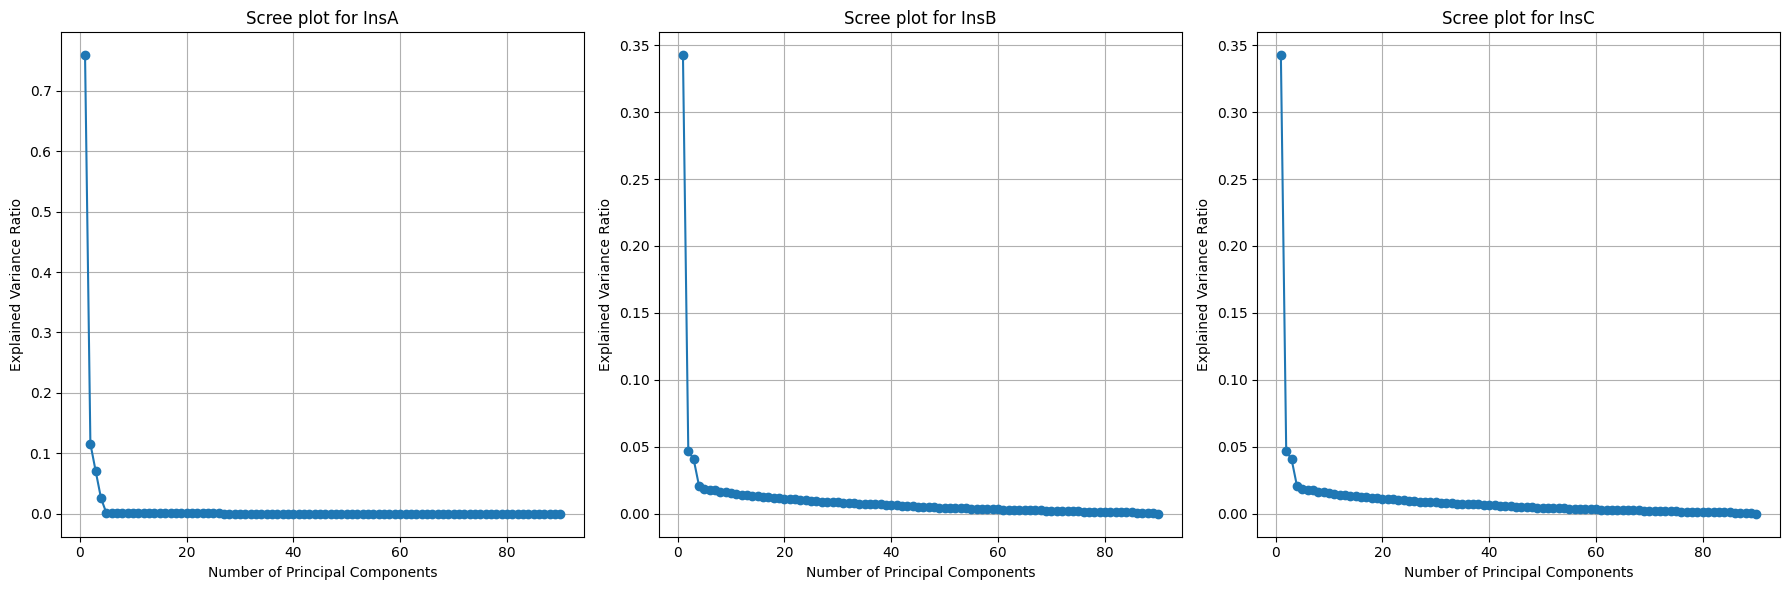

In [24]:
# Plot explained variance for each instrument
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.plot(range(1, len(explained_variance_insA) + 1), explained_variance_insA, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsA')
plt.grid(True)

plt.subplot(132)
plt.plot(range(1, len(explained_variance_insB) + 1), explained_variance_insB, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsB')
plt.grid(True)

plt.subplot(133)
plt.plot(range(1, len(explained_variance_insC) + 1), explained_variance_insC, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsC')
plt.grid(True)

plt.tight_layout()
plt.show()

### Now that we have a rough idea, let us take an enalarged outlook (let us take 1 to 20 components) to determine the exact location of 

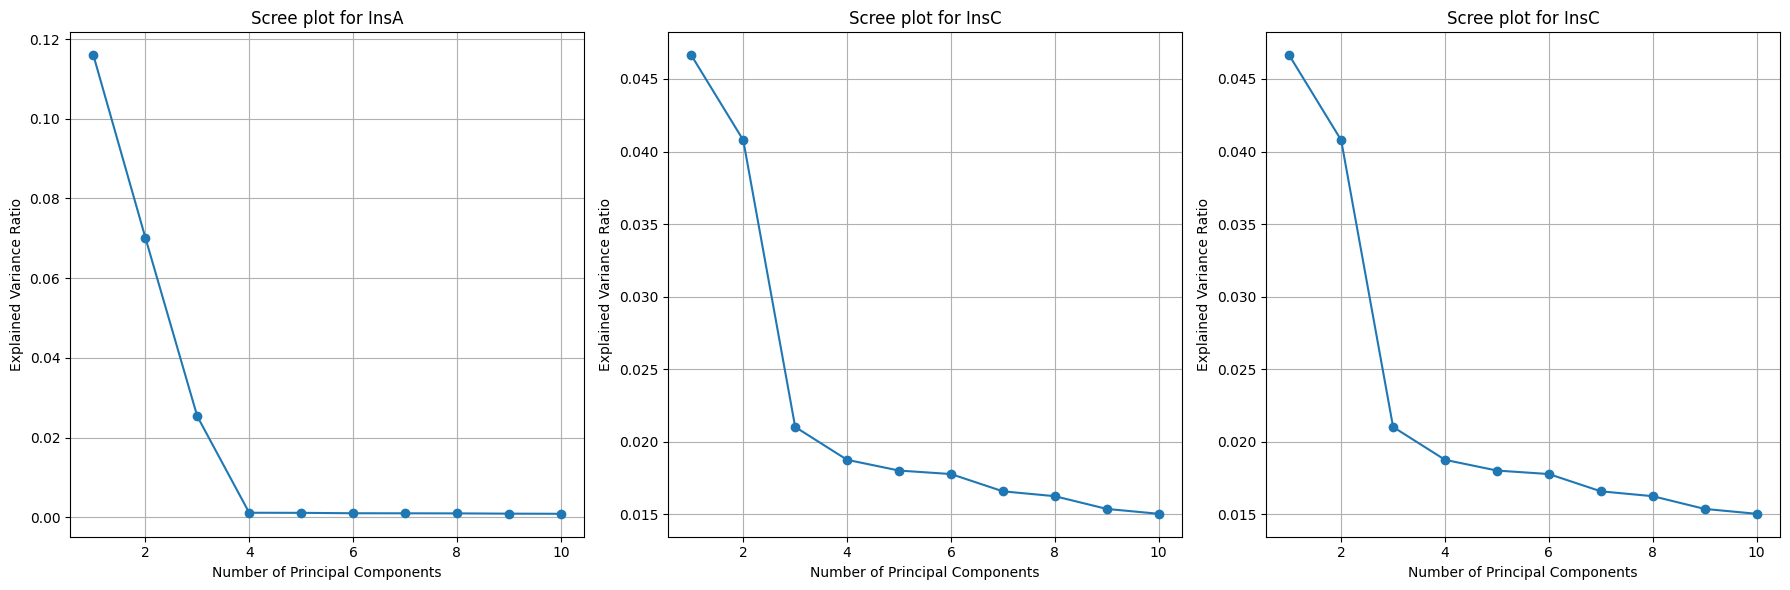

In [25]:
# Plot explained variance for each instrument
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.plot(range(1, 11), explained_variance_insA[1:11], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsA')
plt.grid(True)

plt.subplot(132)
plt.plot(range(1, 11), explained_variance_insB[1:11], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsC')
plt.grid(True)

plt.subplot(133)
plt.plot(range(1, 11), explained_variance_insC[1:11], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsC')
plt.grid(True)

plt.tight_layout()
plt.show()

### Therefore the appropropriate number of principal components based on the elbow point in scree plot are as follows
### InsA = 4, InsB = 3, InsC = 3

### (b) Another 10 samples were collected and analyzed on InsA (Test data.csv). It is been given that one sample has contaminants in it. Identify which sample among them has been contaminated.

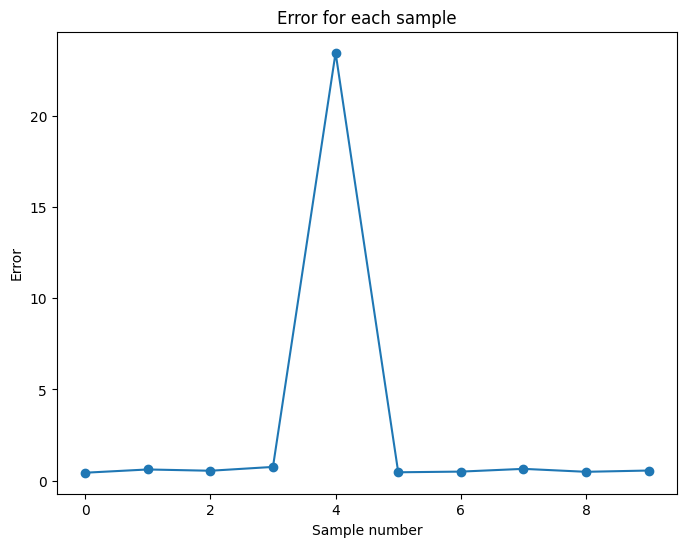

In [26]:
# Standardize the test dataset after fitting the scaler to InsA
scaler = StandardScaler()
scaled_data_insA = scaler.fit_transform(dataframes['InsA'])
scaled_data_test = scaler.transform(dataframes['Test_data'])
#getting the principal components
PC_A = Vta[:4,:]

# Project and reconstruct the test dataset
Test_proj = np.dot(scaled_data_test,PC_A.T)
Test_reconstructed = reconstruct_data_mat(Test_proj,PC_A,5)

# Evaluate the error for each sample
dist = np.zeros(scaled_data_test.shape[0])
for i in range(scaled_data_test.shape[0]):
    dist[i] = np.linalg.norm(np.abs(Test_reconstructed[i]-scaled_data_test[i]))
    error_index = np.argmax(dist)

plt.figure(figsize=(8,6))
plt.plot(dist, marker='o')
plt.ylabel("Error")
plt.xlabel("Sample number")
plt.title("Error for each sample")
plt.show()

In [27]:
print("The sample with conatamination is", error_index + 1)

The sample with conatamination is 5


### Therefore the fifth sample is contaminated